In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [4]:
login_times = pd.read_json('C:\\Users\\rxbro\\Downloads\\1481053515_ultimate_challenge\\ultimate_challenge\\logins.json')

In [5]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [7]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There is one column of type datetime64.  We need to aggregate this data by: <br />
1) Aggregate these login counts based on 15 minute intervals. <br/>
2) Visualize and describe the resulting time series of login counts so we can see the underlying patterns of the demand.

In [8]:
# Step 1 - Aggregate login counts into 15 minute intervals.
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_aggregate = login_times.resample('15min').sum()

In [9]:
login_times_aggregate.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
login_times_aggregate['count'].sum()

93142

In [11]:
# Step 2 - Visualize the time series of login counts in a way that best characterize
# the underlying demand.
login_times_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Data goes from 1/1/1970 to 04-13-1970.

In [12]:
today = datetime.datetime(2021, 1, 15)
today.weekday()

4

Let's look at the entire period.

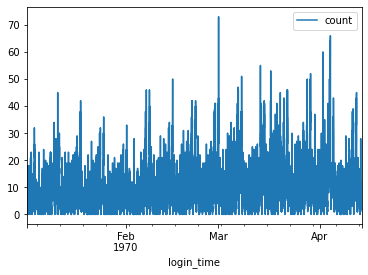

In [13]:
login_times_aggregate.plot()
plt.show()

We can't immediately discern anything from the plot, other than that the demand rises increases in a constant period.  This looks like that demand increases on weekends.  Smoothing the graph will help us here.

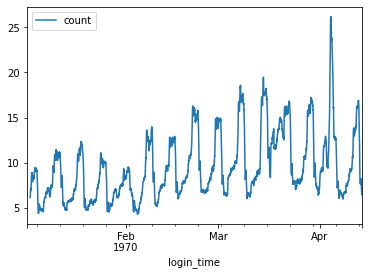

In [14]:
login_times_aggregate.rolling(window=96).mean().plot()
plt.show()

Now we can see that demand rises and falls on a weekly basis.

Let's look at February to see if we can get a closer look.

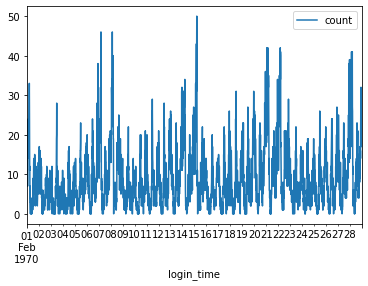

In [15]:
login_times_aggregate.loc['1970-02'].plot()
plt.show()

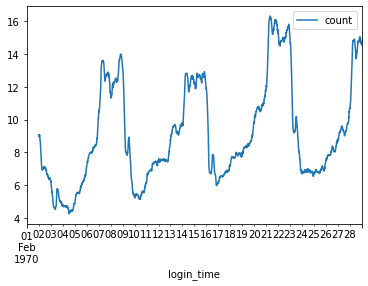

In [16]:
login_times_aggregate.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

We clearly see that demand rises on weekends, however there are some declines in demand in the same time period, mainly because of the time of day that people ride.  Let's dig further down.

In [17]:
# One week
datetime.datetime(1970, 2, 1).weekday()

6

The first day of February, 1970 was on a Sunday.  Let's look at that week.

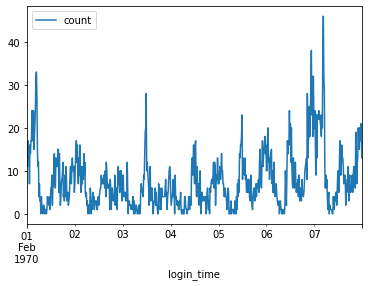

In [18]:
login_times_aggregate.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

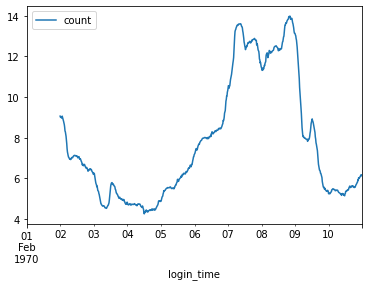

In [19]:
login_times_aggregate.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()
plt.show()

We can easily see that the demand increases on weekends.

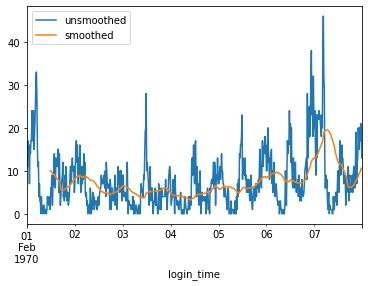

In [20]:
unsmoothed = login_times_aggregate['count']['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

Let's dig further by focusing on weekend.  We'll look at the weekend of Valentine's day, which is the weekend of Friday, February 13 to Monday, February 16.

<AxesSubplot:xlabel='login_time'>

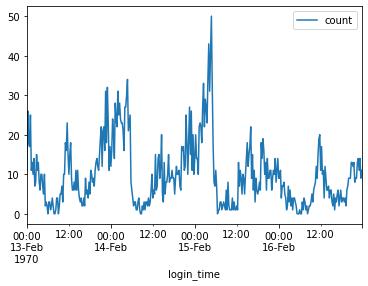

In [21]:
login_times_aggregate.loc['1970-02-13':'1970-02-16'].plot()

Looks like the demand is highest between midnight and 3am followed by precipitous drop after 3am on 2/15, which is a Sunday.  Let's look at two weekdays, a Thursday and a Friday.

<AxesSubplot:xlabel='login_time'>

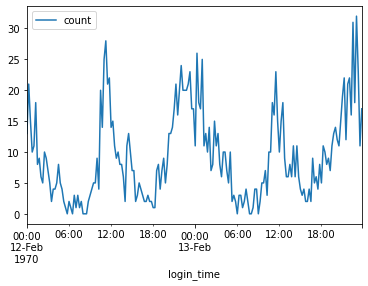

In [22]:
login_times_aggregate.loc['1970-02-12':'1970-02-13'].plot()

Peak times are at 12 noon and midnight.

In [24]:
date = datetime.datetime(1970, 3, 1)
date.weekday()

6

<AxesSubplot:xlabel='login_time'>

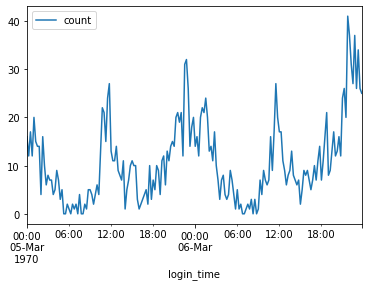

In [25]:
login_times_aggregate.loc['1970-03-05':'1970-03-06'].plot()

Again, we can see that the highest demand is at 12 noon and midnight.

We can draw 2 conclusions from this analysis:
1) Demand is greater on weekends than the rest of the week.<br/>
2) Demand is greatest at 12 noon and midnight during the week.<br />